<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
</center>
<center>Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий

# <center> Capstone проект №1. Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

<font color='red'>**Задание:**</font> заполните код в этой тетрадке и выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc). 


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import pickle
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
PATH_TO_DATA = 'data'

In [33]:
def prepare_train_set(path_to_csv_files, sites, session_length=10, window_size=10):
    files = glob(os.path.join(path_to_csv_files, '*.csv'))
    files.sort()
    columns = ['site' + str(i) for i in range(1, session_length + 1)]
    columns.append('user_id')
    df = pd.DataFrame(columns=columns)
    for file in files:
        user_id = int(os.path.basename(file)[4:-4])
        lines = open(file).readlines()[1:]
        counter = 0
        sites_visited = [0] * session_length
        buffer = []
        for line in lines:
            site_url = line.strip().split(',')[1]
            if site_url not in sites:
                print ("Can't find site", site_url)
            else:
                site = sites[site_url]
            site_id = site[0]
            sites_visited[counter] = site_id
            counter += 1
            if counter == session_length:
                line = dict(zip(columns, sites_visited + [user_id]))
                buffer.append(line)
                counter -= window_size
                sites_visited = sites_visited[window_size:] + [0] * window_size
        while counter > 0:
            line = dict(zip(columns, sites_visited + [user_id]))
            buffer.append(line)
            counter -= window_size
            sites_visited = sites_visited[window_size:] + [0] * window_size
        df = df.append(buffer, ignore_index=True)
    return df

In [34]:
def to_sparse(X, columns_num):
    counter = 0
    values = []
    for row in X:
        sites = {}
        for site_id in row:
            if site_id:
                sites[site_id] = sites.get(site_id, 0) + 1 
        for site_id, value in sorted(sites.items()):
            values.append((value, counter, site_id - 1))
        counter += 1
    site_counters, row_idxs, col_idxs = zip(*values)
    return csr_matrix((site_counters, (row_idxs, col_idxs)),
                      shape=(counter, columns_num), dtype=int)

In [35]:
def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    with open(site_freq_path, 'rb') as site_freq_file:
        sites_freq = pickle.load(site_freq_file)
    df = prepare_train_set(path_to_csv_files, sites_freq,
                           session_length, window_size)
    X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
    X_sparse = to_sparse(X, len(sites_freq))
    return X_sparse, y

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [36]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

In [37]:
path_to_csv_files = os.path.join(PATH_TO_DATA,'3users')
site_freq_path = os.path.join(PATH_TO_DATA,'site_freq_3users.pkl')
session_length=5
window_size=3
with open(site_freq_path, 'rb') as site_freq_file:
    sites_freq = pickle.load(site_freq_file)
df = prepare_train_set(path_to_csv_files, sites_freq,
                       session_length, window_size)
df

,site1,site2,site3,site4,site5,user_id
0,1,2,2,3,2,1
1,3,2,4,5,6,1
2,5,6,7,8,1,1
3,8,1,4,4,4,1
4,4,4,0,0,0,1
5,1,2,9,9,2,2
6,9,2,0,0,0,2
7,10,4,2,4,2,3
8,4,2,4,4,6,3
9,4,6,11,10,10,3


In [38]:
X_toy_s5_w3.todense()

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [39]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3], dtype=object)

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [46]:
%%time
import itertools

data_lengths = []
def pickle_to_file(filename, data):
    with open(os.path.join(PATH_TO_DATA, filename), 'wb') as fl:
        pickle.dump(data, fl, protocol=2)

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            csv_path = os.path.join(PATH_TO_DATA,'{}users'.format(num_users))
            sites_path = os.path.join(PATH_TO_DATA,'site_freq_{}users.pkl'.format(num_users))
            X_sparse, y = prepare_sparse_train_set_window(csv_path, sites_path,
                                       session_length=session_length, window_size=window_size)
            data_lengths.append(y.shape[0])
            filename = 'X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl'
            filename = filename.format(num_users=num_users, session_length=session_length, window_size=window_size)
            print(filename)
            pickle_to_file(filename, X_sparse)
            filename = 'y_{num_users}users_s{session_length}_w{window_size}.pkl'
            filename = filename.format(num_users=num_users, session_length=session_length, window_size=window_size)
            pickle_to_file(filename, y)

X_sparse_10users_s15_w10.pkl
X_sparse_10users_s15_w7.pkl
X_sparse_10users_s10_w7.pkl
X_sparse_10users_s7_w7.pkl
X_sparse_10users_s15_w5.pkl
X_sparse_10users_s10_w5.pkl
X_sparse_10users_s7_w5.pkl
X_sparse_10users_s5_w5.pkl
X_sparse_150users_s15_w10.pkl
X_sparse_150users_s15_w7.pkl
X_sparse_150users_s10_w7.pkl
X_sparse_150users_s7_w7.pkl
X_sparse_150users_s15_w5.pkl
X_sparse_150users_s10_w5.pkl
X_sparse_150users_s7_w5.pkl
X_sparse_150users_s5_w5.pkl
CPU times: user 1min 28s, sys: 3.77 s, total: 1min 32s
Wall time: 1min 43s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [48]:
len(set(data_lengths))

6

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [49]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [50]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,1,2,3,4,3,3,4,3,5,3,31
1,6,7,8,9,3,10,11,12,13,14,31
2,14,4,14,14,15,16,6,17,18,14,31
3,19,20,19,14,14,14,14,21,22,23,31
4,24,14,15,25,26,27,28,29,30,29,31


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [52]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [53]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [54]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

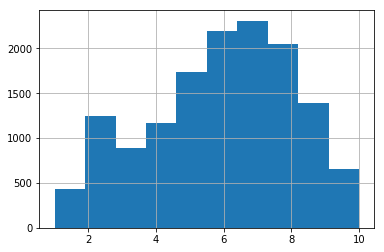

In [55]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [60]:
uniques = pd.Series(num_unique_sites)
uniques.shape

(14061,)

In [58]:
import scipy

scipy.stats.shapiro()

(0.9546931982040405, 0.0)

**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [21]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')

In [22]:
pi_val = stats.binom_test  ''' ВАШ КОД ЗДЕСЬ '''

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [25]:
wilson_interval = ''' ВАШ КОД ЗДЕСЬ '''

In [26]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))

**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [28]:
site_freqs = ''' ВАШ КОД ЗДЕСЬ '''

In [ ]:
''' ВАШ КОД ЗДЕСЬ '''

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [31]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [32]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [34]:
''' ВАШ КОД ЗДЕСЬ '''

На 3 неделе мы займемся визуальным анализом данных и построением признаков.